# OSNA Project 1

## Team Members:

### 1. Shreenidhi - A
### 2. Pratik Jadhav - A20543728

# Part 1

### Constructing the graph using only the Nodes interconnected between the Author of the post and the authors of the comments on the post 

**Importing the required libraries**

In [113]:
import praw
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyvis.network import Network

**Initialize the Reddit object and fetching the data for the subreddit "SocialMedia"**

In [114]:
reddit = praw.Reddit(client_id='hhjRhxhEn6ZNdJJCkUd8TQ',
                     client_secret='WKVxcma6auPs8A5ghaj7CWmh2zDAEg',
                     username='Either-Two-1843',
                     password='Shree_123456',
                     user_agent='Project1_OSNA')

subreddit = reddit.subreddit('socialmedia')

**Initializing the lists which will get populated with Redditor data**

In [115]:
connected_nodes = []
authors = []

**Constructing the function which will add data to the lists**

In [116]:
def populating_data(graph, comment, parent_author):
    if comment.author is not None:
        temp = [parent_author, comment.author]
        if comment.author not in authors:
            authors.append(comment.author)

        connected_nodes.append(temp)

**Here, using the NetworkX graph to construct the graph**

In [117]:
g = nx.Graph()

# Fetching the top 50 reddist posts on "SocialMedia"
posts = subreddit.top(limit=50)

In [118]:
# Iterating over the posts
for post in posts:
    print(f"Author: {post.author}\nTitle: {post.title}\n\n")
    
    # Adding a null safety
    if post.author is not None:
        if post.author not in authors:
            authors.append(post.author)

    # Iterating over the top comments list
    post.comment_limit = 20
    for comment in post.comments.list():
        # Checking whether the comment is not of type Morecomments to avoid errors
        if not type(comment) is praw.models.MoreComments:
            populating_data(g, comment, post.author)

Author: Felkalin
Title: Censorship has gone too far


Author: JohnnyFire
Title: UPDATE: Kelly Blazek, Cleveland Job Bank Founder who rebuked LinkedIn requests with nasty emails, has lost her IABC Communicator of the Year Award


Author: SXSWBot
Title: Burger King uses 50cent to promote his new BKCoffee !


Author: curveballhomerun
Title: Freelance Social Media? Two things I did that my clients loved (you can download them.)


Author: froggie5ohhhhh
Title: 10 Minute Tweaks To Improve your Social/Digital Media TODAY (on any social platform)


Author: SebastianJuhola
Title: How I grew an Instagram account from 4000 followers to 190k in a year


Author: lazymentors
Title: I interviewed 3 Instagram Employees & Studied 2,000+ Posts. Here’s How Instagram algorithm works in 2022!


Author: DedicatedSloth
Title: I was wrong, Tik Tok isn't all dances, lip syncs, and jokes. It's been a major supportive outlet for dealing with mental health and depression.


Author: hinba
Title: Reddit surpasses F

**We can have a look at the connected nodes**

In [119]:
connected_nodes[:10]

[[Redditor(name='Felkalin'), Redditor(name='AutoModerator')],
 [Redditor(name='Felkalin'), Redditor(name='SonofaBranMuffin')],
 [Redditor(name='Felkalin'), Redditor(name='niooosan')],
 [Redditor(name='Felkalin'), Redditor(name='lord__cuthbert')],
 [Redditor(name='Felkalin'), Redditor(name='KosmicKoda')],
 [Redditor(name='Felkalin'), Redditor(name='ResponsibleSteak4994')],
 [Redditor(name='Felkalin'), Redditor(name='A55_Cactu5')],
 [Redditor(name='Felkalin'), Redditor(name='blue_strawberryx')],
 [Redditor(name='Felkalin'), Redditor(name='IAmBabs')],
 [Redditor(name='Felkalin'), Redditor(name='LikeALoneRanger')]]

In [120]:
authors[:10]

[Redditor(name='Felkalin'),
 Redditor(name='AutoModerator'),
 Redditor(name='SonofaBranMuffin'),
 Redditor(name='niooosan'),
 Redditor(name='lord__cuthbert'),
 Redditor(name='KosmicKoda'),
 Redditor(name='ResponsibleSteak4994'),
 Redditor(name='A55_Cactu5'),
 Redditor(name='blue_strawberryx'),
 Redditor(name='IAmBabs')]

**Let's construct a Dataframe consisting of the Author and Commentor as the data columns**

In [121]:
nodedf = pd.DataFrame(nodes, columns=['Author', 'Commentor']).dropna()

In [122]:
nodedf.head()

,Author,Commentor
0,Felkalin,AutoModerator
1,Felkalin,SonofaBranMuffin
2,Felkalin,niooosan
3,Felkalin,lord__cuthbert
4,Felkalin,KosmicKoda


**Generating the graph using dataframe**

In [123]:
graph = nx.from_pandas_edgelist(nodedf, source="Author", target="Commentor")

In [124]:
graph

**Printing the total number of nodes and the edges between them**

In [125]:
print(f"Nodes: {len(graph.nodes())}\nEdges: {len(graph.edges())}")

Nodes: 591
Edges: 626


**Displaying the graph using Pyvis**

In [126]:
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True, cdn_resources='in_line')

for node in graph.nodes():
    g_pyvis.add_node(str(node))

for edge in graph.edges():
    g_pyvis.add_edge(str(edge[0]), str(edge[1]))

g_pyvis.show("pyvis_network.html")

pyvis_network.html


**Representing the degree distribution histogram**

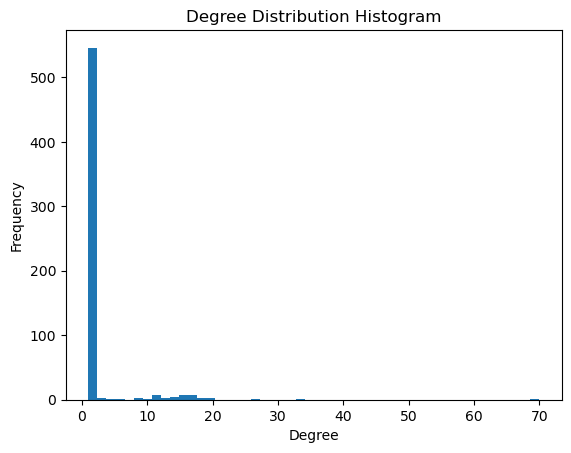

In [127]:
degree = [d for _, d in graph_api.degree()]
degree_histogram = nx.degree_histogram(graph)

plt.hist(degree, bins=50)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution Histogram")
plt.show()

**Calculating the Clustering coefficient by calculating the average of the nodes in the graph**

In [128]:
average_clustering = nx.average_clustering(graph)
print(f"Clustering Coefficient: {average_clustering}")

Clustering Coefficient: 0.0


**Displaying the closness centrality from the graph**

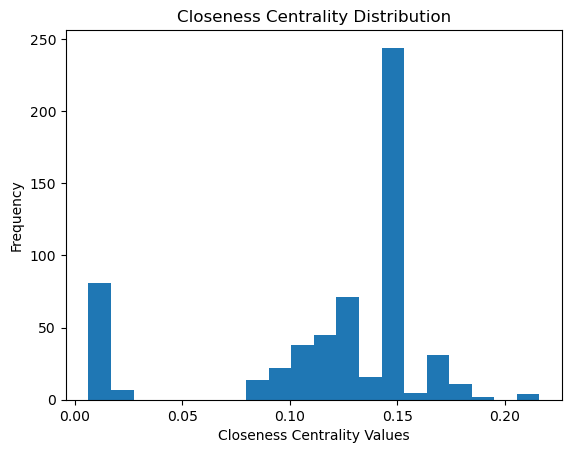

In [129]:
closeness_centrality = nx.closeness_centrality(graph)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality Values')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()

**Let's calculate the average and the median of the Closeness Centrality**

In [130]:
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
median_closeness_centrality = np.median(list(closeness_centrality.values()))
print(f"Average Closeness Centrality: {average_closeness_centrality}")
print(f"Median Closeness Centrality: {median_closeness_centrality}")

Average Closeness Centrality: 0.11868731223795102
Median Closeness Centrality: 0.14357157100128187


**Displaying an Histogram of the Degree centrality of the nodes connected with the edges**

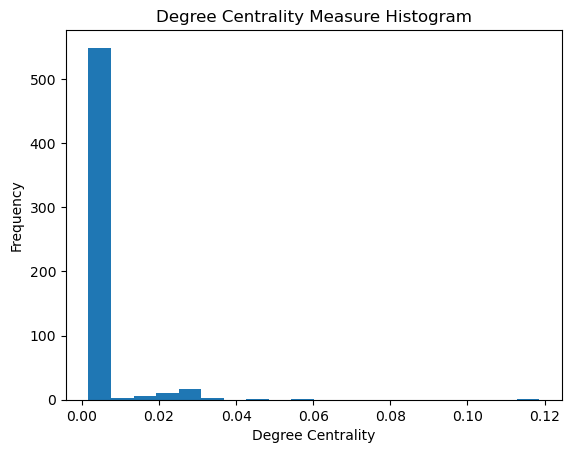

In [131]:
degree_centrality = nx.degree_centrality(graph)

plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Measure Histogram')
plt.show()

**Let's calculate the average and the median of the Degree Centrality**

In [132]:
average_degree_centrality = np.mean(list(degree_centrality.values()))
median_degree_centrality = np.median(list(degree_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality}")
print(f"Median Degree Centrality: {median_degree_centrality}")

Average Degree Centrality: 0.0035905818922251855
Median Degree Centrality: 0.001694915254237288


**Displaying an Histogram of the Betweenness centrality of the nodes connected with the edges**

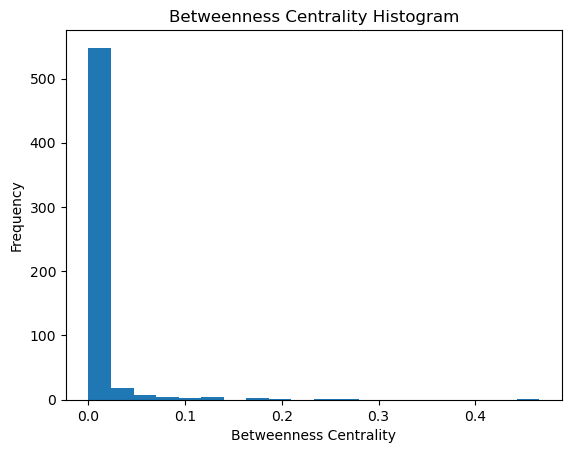

In [133]:
betweenness_centrality = nx.betweenness_centrality(graph)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Histogram")
plt.show()

**Let's calculate the average and the median of the Betweenness Centrality**

In [134]:
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
median_betweenness_centrality = np.median(list(betweenness_centrality.values()))
print(f"Average Betweenness Centrality: {average_betweenness_centrality}")
print(f"Median Betweenness Centrality: {median_betweenness_centrality}")

Average Betweenness Centrality: 0.006613080703078771
Median Betweenness Centrality: 0.0


**Displaying an Histogram of the Katz Centrality among the nodes in the graph**

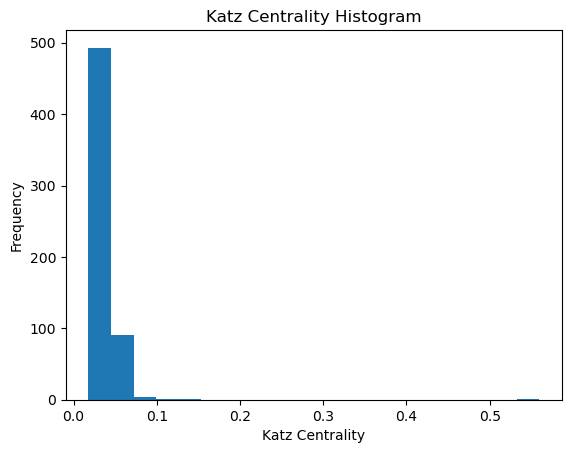

In [135]:
katz_centrality = nx.katz_centrality(graph)
katz_values = list(katz_centrality.values())

plt.hist(katz_values, bins=20)
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")
plt.title("Katz Centrality Histogram")
plt.show()

**Let's calculate the average and the median of the Katz of the graph**

In [136]:
average_katz_values = np.mean(katz_values)
median_katz_values = np.median(katz_values)
print(f"Average of Katz centrality values: {average_katz_values}")
print(f"Median of Katz centrality values: {median_katz_values}")

Average of Katz centrality values: 0.02973527153206457
Median of Katz centrality values: 0.020963591856019457


**Displaying the Page rank representation of the Graph**

In [137]:
page_rank_graph = Network(height="800px", width="100%", notebook=True, cdn_resources='in_line')

for node, pagerank_value in pagerank.items():
    node_id = str(node)
    page_rank_graph.add_node(node_id, title=f"PageRank: {pagerank_value}")

for edge in graph_api.edges():
    page_rank_graph.add_edge(str(edge[0]), str(edge[1]))

page_rank_graph.barnes_hut()

page_rank_graph.show("pagerank1.html")

pagerank1.html


# Part 2

### Constructing the graph using only the Nodes interconnected between the Author of the post and the authors of the comments on the post and also the replies on each comment

### This increasing the connectivity between the nodes and a high ratio of increment in the edges between the nodes

**We are going to follow the similar steps, however, we are also going to add the authors of the replies in the comments, which increases the closeness, connectvity and the betweenness of the nodes**

In [138]:
subreddit = reddit.subreddit('socialmedia')

connected_nodes = []
authors = []

def populating_data_with_more_comments(g, comment, parent_author):
    if comment.author is not None:
        if comment.author not in authors:
            authors.append(comment.author)

        temp = [parent_author, comment.author]
        
        # Fetching and adding the replies in the connected_nodes
        for reply in comment.replies.list():
            if type(reply) is not praw.models.MoreComments:
                populating_data_with_more_comments(g, reply, comment.author)
        connected_nodes.append(temp)

g = nx.Graph()

submissions = subreddit.top(limit=50)

for post in submissions:
    print(f"Author: {post.author}\nTitle: {post.title}\n\n")
    if post.author is not None:
        if post.author not in authors:
            authors.append(post.author)

    post.comment_limit = 20
    for comment in post.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        populating_data_with_more_comments(g, comment, post.author)

Author: Felkalin
Title: Censorship has gone too far


Author: JohnnyFire
Title: UPDATE: Kelly Blazek, Cleveland Job Bank Founder who rebuked LinkedIn requests with nasty emails, has lost her IABC Communicator of the Year Award


Author: SXSWBot
Title: Burger King uses 50cent to promote his new BKCoffee !


Author: curveballhomerun
Title: Freelance Social Media? Two things I did that my clients loved (you can download them.)


Author: froggie5ohhhhh
Title: 10 Minute Tweaks To Improve your Social/Digital Media TODAY (on any social platform)


Author: SebastianJuhola
Title: How I grew an Instagram account from 4000 followers to 190k in a year


Author: lazymentors
Title: I interviewed 3 Instagram Employees & Studied 2,000+ Posts. Here’s How Instagram algorithm works in 2022!


Author: DedicatedSloth
Title: I was wrong, Tik Tok isn't all dances, lip syncs, and jokes. It's been a major supportive outlet for dealing with mental health and depression.


Author: hinba
Title: Reddit surpasses F

In [139]:
connected_nodes[:10]

authors[:10]

[Redditor(name='Felkalin'),
 Redditor(name='AutoModerator'),
 Redditor(name='SonofaBranMuffin'),
 Redditor(name='blue_strawberryx'),
 Redditor(name='zenware'),
 Redditor(name='dragonsapphic'),
 Redditor(name='chjesper'),
 Redditor(name='Moist_Confusion'),
 Redditor(name='niooosan'),
 Redditor(name='IAmBabs')]

In [140]:
nodedf = pd.DataFrame(connected_nodes, columns=['Author', 'Commentor']).dropna()

nodedf.head()

,Author,Commentor
0,Felkalin,AutoModerator
1,blue_strawberryx,zenware
2,zenware,blue_strawberryx
3,zenware,dragonsapphic
4,zenware,zenware


**We can see an increase between the edges even though having the same number of nodes**

In [141]:
graph = nx.from_pandas_edgelist(nodedf, source="Author", target="Commentor")

print(f"Nodes: {len(graph.nodes())}\nEdges: {len(graph.edges())}")

Nodes: 598
Edges: 836


In [142]:
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

for node in graph_api.nodes():
    g_pyvis.add_node(str(node))

for edge in graph_api.edges():
    g_pyvis.add_edge(str(edge[0]), str(edge[1]))

g_pyvis.show("pyvis_network.html")

pyvis_network.html


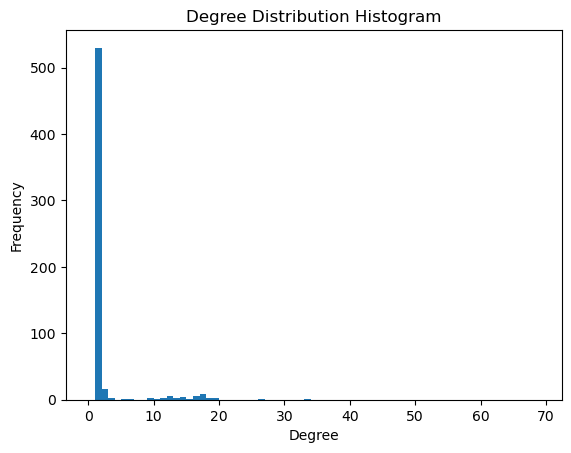

In [143]:
degree = [d for _, d in graph_api.degree()]
degree_histogram = nx.degree_histogram(graph)

plt.hist(degree_sequence, bins=range(max(degree)))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution Histogram")
plt.show()

In [144]:
average_clustering = nx.average_clustering(graph)
print(f"Clustering Coefficient: {average_clustering}")

Clustering Coefficient: 0.31406727702412124


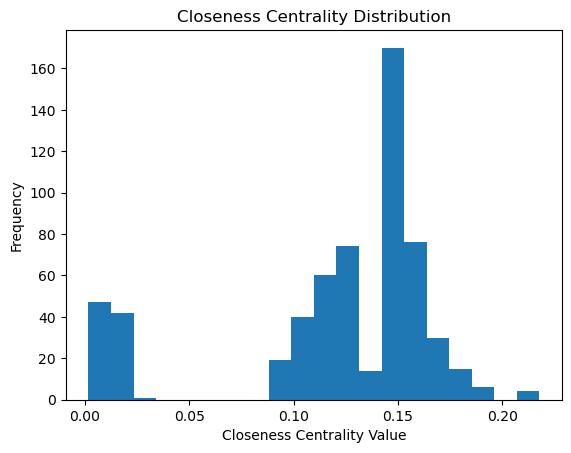

In [145]:
closeness_centrality = nx.closeness_centrality(graph)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality Value')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()

In [146]:
average = np.mean(list(closeness_centrality.values()))
median = np.median(list(closeness_centrality.values()))
print(f"Average Closeness Centrality: {average}")
print(f"Median Closeness Centrality: {median}")

Average Closeness Centrality: 0.11941175748498291
Median Closeness Centrality: 0.14335651329297452


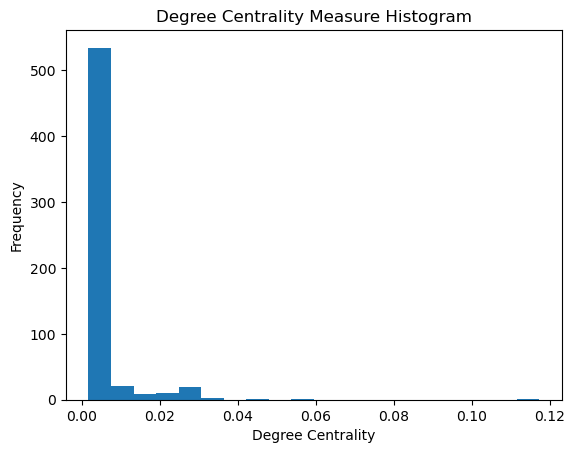

In [147]:
degree_centrality = nx.degree_centrality(graph)

plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Measure Histogram')
plt.show()

In [148]:
mean_degree_centrality = np.mean(list(degree_centrality.values()))
median_degree_centrality = np.median(list(degree_centrality.values()))

print(f"Average Degree Centrality: {mean_degree_centrality}")
print(f"Median Degree Centrality: {median_degree_centrality}")

Average Degree Centrality: 0.004683394676840166
Median Degree Centrality: 0.0016750418760469012


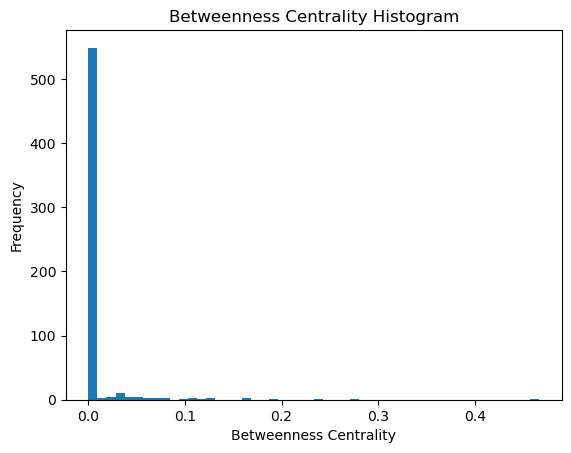

In [149]:
betweenness_centrality = nx.betweenness_centrality(graph)

plt.hist(list(betweenness_centrality.values()), bins=50)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Histogram")
plt.show()

In [150]:
average = np.mean(list(betweenness_centrality.values()))
median = np.median(list(betweenness_centrality.values()))
print(f"Average Betweenness Centrality: {average}")
print(f"Median Betweenness Centrality: {median}")

Average Betweenness Centrality: 0.006445927797652867
Median Betweenness Centrality: 0.0


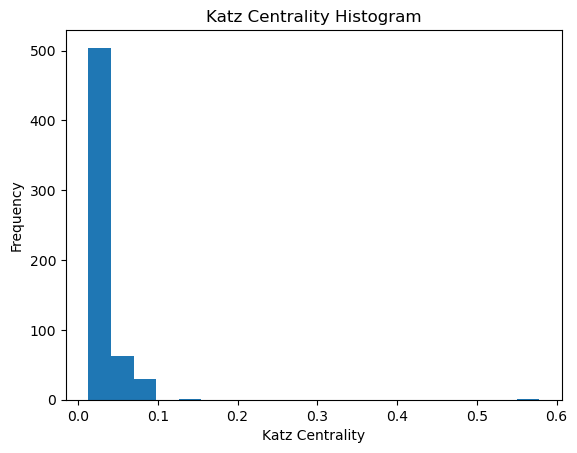

In [151]:
katz_centrality = nx.katz_centrality(graph)
katz_values = list(katz_centrality.values())

plt.hist(katz_values, bins=20)
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")
plt.title("Katz Centrality Histogram")
plt.show()

In [152]:
average = np.mean(katz_values)
median = np.median(katz_values)
print(f"Average of Katz centrality values: {average}")
print(f"Median of Katz centrality values: {median}")

Average of Katz centrality values: 0.027935640188774143
Median of Katz centrality values: 0.01841834023846006


In [47]:
pyvis_graph = Network(height="800px", width="100%", notebook=True)

for node, pagerank_value in pagerank.items():
    node_id = str(node)
    pyvis_graph.add_node(node_id, title=f"PageRank: {pagerank_value}")

for edge in graph_api.edges():
    pyvis_graph.add_edge(str(edge[0]), str(edge[1]))

pyvis_graph.barnes_hut()

pyvis_graph.show("pagerank2.html")

pagerank2.html


# Conclusion: